In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
def ucb1(n_arms, k):
    rewards = np.zeros(n_arms)
    pulls = np.zeros(n_arms)
    total_rewards = []
    ucb_values = []
    total_reward = 0

    for t in range(k):
        ucb = np.zeros(n_arms)
        for arm in range(n_arms):
            if pulls[arm] == 0:
                ucb[arm] = float('inf')
            else:
                average_reward = rewards[arm] / pulls[arm]
                confidence_bound = np.sqrt(2 * np.log(t + 1) / pulls[arm])
                ucb[arm] = average_reward + confidence_bound

        arm_to_pull = np.argmax(ucb)
        reward = np.random.normal(loc=arm_to_pull, scale=1)
        rewards[arm_to_pull] += reward
        pulls[arm_to_pull] += 1
        total_reward += reward
        total_rewards.append(total_reward)
        ucb_values.append(ucb.copy())

    return total_rewards, np.array(ucb_values)

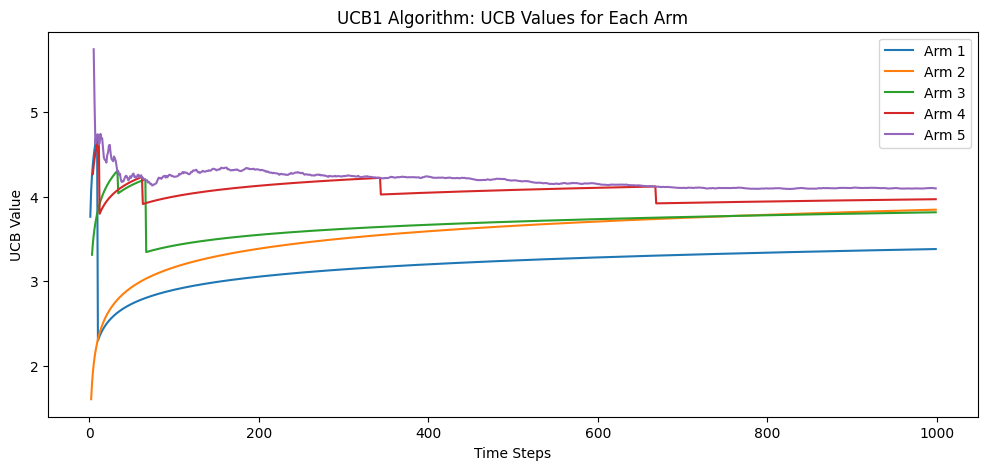

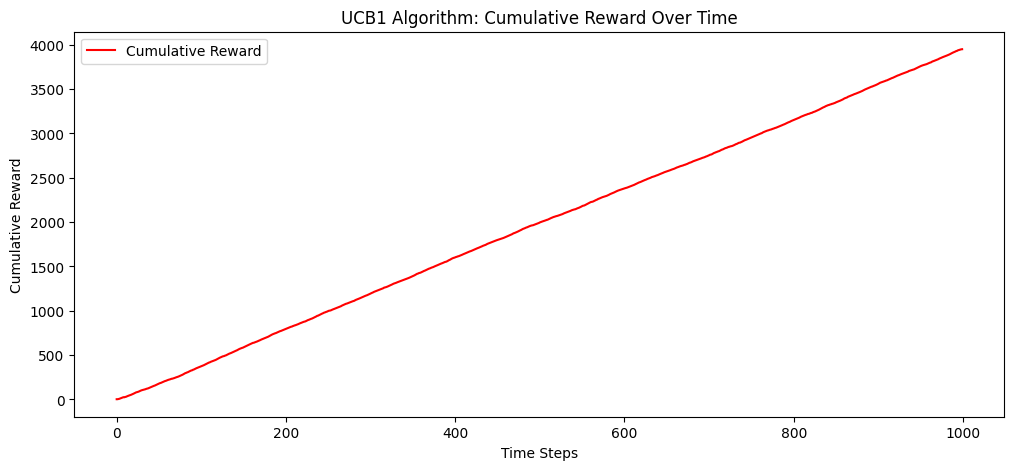

In [19]:
n_arms = 5
k = 1000
cumulative_rewards, ucb_values = ucb1(n_arms, k)

plt.figure(figsize=(12, 5))
for arm in range(n_arms):
    plt.plot(ucb_values[:, arm], label=f'Arm {arm + 1}')
plt.xlabel('Time Steps')
plt.ylabel('UCB Value')
plt.title('UCB1 Algorithm: UCB Values for Each Arm')
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(range(k), cumulative_rewards, label="Cumulative Reward", color='red')
plt.xlabel('Time Steps')
plt.ylabel('Cumulative Reward')
plt.title('UCB1 Algorithm: Cumulative Reward Over Time')
plt.legend()
plt.show()